# Weather Analysis

1. As the Latitude increases, the temperature increases

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import csv
import pandas as pd
import random
import seaborn as sns
from pprint import pprint
from myKey import key
from citipy import citipy

In [6]:

x_coord = []
y_coord = []
for count in range(300):
    x_coord.append(random.randrange(0,180))
    x_coord.append(random.randrange(0,180))
    x_coord.append(random.randrange(0,180)*(-1))
    x_coord.append(random.randrange(0,180)*(-1))

for count in range(300):
    y_coord.append(random.randrange(0,90))
    y_coord.append(random.randrange(0,90))
    y_coord.append(random.randrange(0,90)*(-1))
    y_coord.append(random.randrange(0,90)*(-1))

cities_df = pd.DataFrame({
    'x' : x_coord,
    'y' : y_coord
})
print(len(cities_df))
print(cities_df.head())

1200
     x   y
0   18  75
1   85   9
2 -139 -21
3 -158 -69
4  169  55


In [7]:
#get list of cities
cities = []
countries = []
for index, row in cities_df.iterrows():
    lon = float(row["x"])
    lat = float(row["y"])
    city = citipy.nearest_city(lat, lon)
    cities.append(city.city_name)
    countries.append(city.country_code.upper())
    
cities_df['city'] = cities
cities_df['country'] = countries

cities_df = cities_df.drop_duplicates('city')

print(len(cities_df))
print(cities_df.head())


487
     x   y          city country
0   18  75  longyearbyen      SJ
1   85   9    batticaloa      LK
2 -139 -21       rikitea      PF
3 -158 -69       mataura      PF
4  169  55    nikolskoye      RU


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather"
query_params = {
    'appid': key,
    'units': 'metric',
    'q': 'khatanga'
}
api_call = requests.get(url, params=query_params)
print(api_call.url)
print('hello')
response = api_call.json()
pprint(response)


print(response['coord']['lat'])
print(response['main']['temp'])
print(response['clouds']['all'])
print(response['main']['humidity'])
print(response['wind']['speed'])
print(response['coord']['lat'])

http://api.openweathermap.org/data/2.5/weather?appid=f810ff617c37da540f9e096683959869&units=metric&q=khatanga
hello
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 71.98, 'lon': 102.47},
 'dt': 1528769707,
 'id': 2022572,
 'main': {'grnd_level': 1019.67,
          'humidity': 50,
          'pressure': 1019.67,
          'sea_level': 1024.21,
          'temp': 17.79,
          'temp_max': 17.79,
          'temp_min': 17.79},
 'name': 'Khatanga',
 'sys': {'country': 'RU', 'message': 0.0032, 'sunrise': 0, 'sunset': 0},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 128.001, 'speed': 3.46}}
71.98
17.79
20
50
3.46
71.98


In [9]:
with open('log.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(['City Number', 'City Name', 'Requested URL'])
    
    # Build URL
    url = "http://api.openweathermap.org/data/2.5/weather"
    query_params = {
        'appid': key,
        'units': 'metric'
    }

    cities = cities_df['city']

    # set up lists to hold reponse info
    lat = []
    temp = []
    cloud = []
    humidity = []
    wind_speed = []
    error = []
    count = 0
    # Loop through the list of cities and perform a request for data on each
    for city in cities:
        try:
            query_params['q'] = city
            api_call = requests.get(url, params=query_params)
            response = api_call.json()
            #lat.append(response)
            lat.append(response['coord']['lat'])
            temp.append(response['main']['temp'])
            cloud.append(response['clouds']['all'])
            humidity.append(response['main']['humidity'])
            wind_speed.append(response['wind']['speed'])
        except KeyError:
            lat.append('Error')
            temp.append('Error')
            cloud.append('Error')
            humidity.append('Error')
            wind_speed.append('Error')
            error.append(city)

        csvwriter.writerow([count, city, api_call.url])
        count = count + 1
        
cities_df['lat'] = lat
cities_df['temp'] = temp
cities_df['cloud'] = cloud
cities_df['humidity'] = humidity
cities_df['wind_speed'] = wind_speed 
print(cities_df.head())

#print(lat[0])
#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")

     x   y          city country    lat   temp cloud humidity wind_speed
0   18  75  longyearbyen      SJ  78.22     -1    90       86        1.5
1   85   9    batticaloa      LK   7.71  30.14    32       87       4.36
2 -139 -21       rikitea      PF -23.12  23.19    76      100       8.81
3 -158 -69       mataura      PF -46.19   4.79    56       94       2.86
4  169  55    nikolskoye      RU   59.7     15     0       87          2


In [10]:
#list of cities not found by API
print(error)

['ust-kamchatsk', 'belushya guba', 'solovetskiy', 'amderma', 'nizhneyansk', 'krasnoselkup', 'eskasem', 'marcona', 'makung', 'sembe', 'chardara', 'saleaula', 'sedelnikovo', 'londoko', 'bandar-e torkaman', 'samusu', 'sentyabrskiy', 'karaul', 'chagda', 'karkaralinsk', 'hihifo', 'pemangkat', 'ondorhaan', 'maridi', 'ketchenery', 'asayita', 'yialos', 'aflu', 'gurgan', 'haibowan', 'el mahalla el kubra', 'kamenskoye', 'dunayivtsi', 'dzhusaly', 'barentsburg', 'saryshagan', 'tawkar', 'xiangfan', 'vaitupu', 'sao raimundo nonato', 'bac lieu', 'artyk', 'astipalaia', 'aporawan', 'ciras', 'kuche', 'tuggurt', 'tungkang', 'kracheh', 'falaleu', 'falealupo', 'villazon', 'viligili', 'khonuu', 'fevralsk', 'bargal', 'kazalinsk', 'qui nhon', 'paradwip']


In [11]:
#clean data by removing all 'Error'
#or just set any error as NaN in the DF and then run np.dropna from the numpy pkg.
cities_df = cities_df[cities_df['temp'] != 'Error']
print(len(cities_df))
print(cities_df.head())

428
     x   y          city country    lat   temp cloud humidity wind_speed
0   18  75  longyearbyen      SJ  78.22     -1    90       86        1.5
1   85   9    batticaloa      LK   7.71  30.14    32       87       4.36
2 -139 -21       rikitea      PF -23.12  23.19    76      100       8.81
3 -158 -69       mataura      PF -46.19   4.79    56       94       2.86
4  169  55    nikolskoye      RU   59.7     15     0       87          2


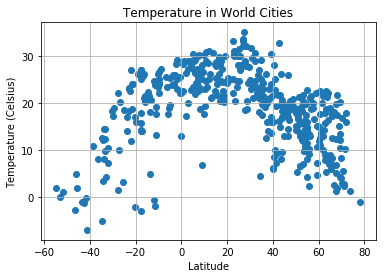

In [12]:
plt.scatter(cities_df["lat"], cities_df["temp"], marker="o")
#plt.scatter(cities_df["lat"], cities_df["cloud"], marker="o")
#plt.scatter(cities_df["lat"], cities_df["humidity"], marker="o")
#plt.scatter(cities_df["lat"], cities_df["wind_speed"], marker="o")
# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

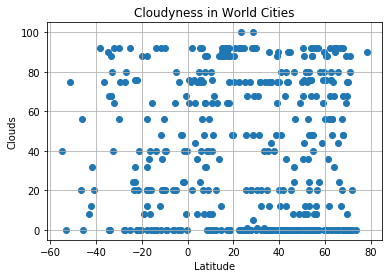

In [13]:
plt.scatter(cities_df["lat"], cities_df["cloud"], marker="o")

plt.title("Cloudyness in World Cities")
plt.ylabel("Clouds")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloundsInWorldCities.png")

plt.show()

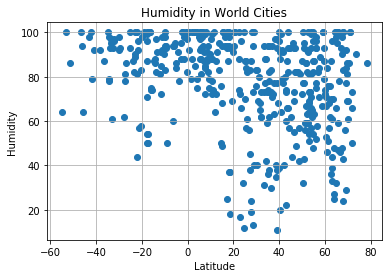

In [14]:
plt.scatter(cities_df["lat"], cities_df["humidity"], marker="o")

plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

plt.show()

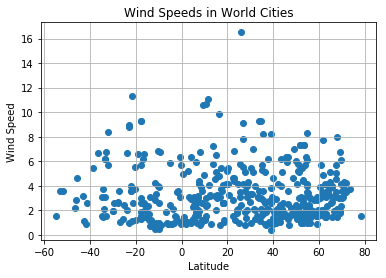

In [15]:
plt.scatter(cities_df["lat"], cities_df["wind_speed"], marker="o")

plt.title("Wind Speeds in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindInWorldCities.png")

plt.show()